# MAFALDA Dataset Exploratory Data Analysis

URL: https://github.com/ChadiHelwe/MAFALDA



In [2]:
%load_ext autoreload
%autoreload 2

from src.mafalda import get_mafalda_df, get_mafalda_fallacies_df
from src.plot import save_plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [3]:
df_mafalda = get_mafalda_df('new')
df_fallacies = get_mafalda_fallacies_df()

[2024-11-18 11:31:30] Created new mafalda dataframe.


In [4]:
df_mafalda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   text                   200 non-null    object
 1   labels                 200 non-null    object
 2   comments               200 non-null    object
 3   sentences_with_labels  200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [5]:
df_mafalda['label_count'] = df_mafalda['labels'].apply(lambda x: len(x))

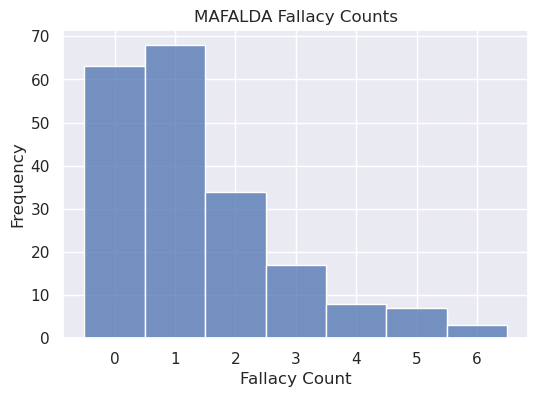

In [6]:
_, ax = plt.subplots(figsize=(6, 4))
sns.histplot(df_mafalda['label_count'], discrete=True, ax=ax)

title = 'MAFALDA Fallacy Counts'
plt.title(title)
plt.xlabel('Fallacy Count')
plt.ylabel('Frequency')
# plt.bar_label(ax.containers[0], label_type='edge')

save_plot(title)
plt.show()

In [7]:
df_mafalda['text_length'] = df_mafalda['text'].apply(lambda x: len(x))

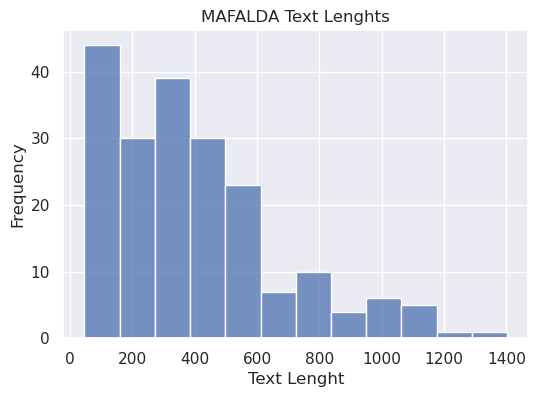

In [8]:
_, ax = plt.subplots(figsize=(6, 4))
sns.histplot(df_mafalda['text_length'], ax=ax)

title = 'MAFALDA Text Lenghts'
plt.title(title)
plt.xlabel('Text Lenght')
plt.ylabel('Frequency')

save_plot(title)
plt.show()

In [15]:
# Count fallacy annotations per fallacy type
df_fallacies['annotations'] = 0
for annotations in df_mafalda['labels']:
    for annotation in annotations:
        label = annotation[2].lower()
        df_fallacies.loc[df_fallacies['label'] == label, 'annotations'] += 1


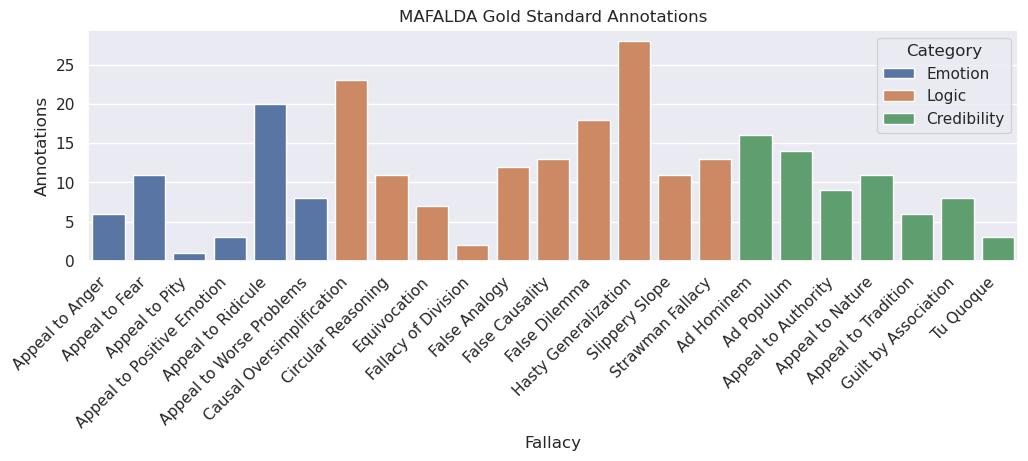

In [23]:
_, ax = plt.subplots(figsize=(12, 3))
sns.barplot(x='fallacy', y='annotations', data=df_fallacies.reset_index(), hue='category', ax=ax)
plt.xticks(rotation=45, ha='right')
title = 'MAFALDA Gold Standard Annotations'
plt.title(title)
plt.xlabel('Fallacy')
plt.ylabel('Annotations')
plt.legend(title='Category')

save_plot(title)
plt.show()